In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from joblib import Parallel, delayed

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../datasets/network_anomaly_dataset_cleaned.csv")
df.head()

,Unnamed: 0,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,attackhlc
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [4]:
# dropping "Unnamed: 0" column
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,attackhlc
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [5]:
# shape of the data
df.shape

(125973, 44)

In [6]:
# data types of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [7]:
# missing values
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [8]:
# duplicate values
df.duplicated().sum()

0

In [9]:
# statistical summary of numerical columns
with open("../artifacts/statistical_summary.txt", "w+") as file:
    file.write(df.describe().T.to_string())

In [10]:
%cat ../artifacts/statistical_summary.txt

                           count          mean           std  min    25%     50%     75%           max
duration                125973.0    287.144650  2.604515e+03  0.0   0.00    0.00    0.00  4.290800e+04
srcbytes                125973.0  45566.743000  5.870331e+06  0.0   0.00   44.00  276.00  1.379964e+09
dstbytes                125973.0  19779.114421  4.021269e+06  0.0   0.00    0.00  516.00  1.309937e+09
land                    125973.0      0.000198  1.408607e-02  0.0   0.00    0.00    0.00  1.000000e+00
wrongfragment           125973.0      0.022687  2.535300e-01  0.0   0.00    0.00    0.00  3.000000e+00
urgent                  125973.0      0.000111  1.436603e-02  0.0   0.00    0.00    0.00  3.000000e+00
hot                     125973.0      0.204409  2.149968e+00  0.0   0.00    0.00    0.00  7.700000e+01
numfailedlogins         125973.0      0.001222  4.523914e-02  0.0   0.00    0.00    0.00  5.000000e+00
loggedin                125973.0      0.395736  4.890101e-01  0.0   0.00 

In [11]:
# value counts
output = []

for i in df.columns:
    output.append("--------------------")
    output.append(f"Column Name: {i}")
    output.append(str(df[i].value_counts()))
    output.append("--------------------\n")

output = "\n".join(output)

with open("../artifacts/value_counts.txt", "w+") as file:
    file.write(output)

In [12]:
%cat ../artifacts/value_counts.txt

--------------------
Column Name: duration
duration
0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: count, Length: 2981, dtype: int64
--------------------

--------------------
Column Name: protocoltype
protocoltype
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64
--------------------

--------------------
Column Name: service
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64
--------------------

--------------------
Column Name: flag
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype

In [13]:
# frequency of occurrence of elements
output = []

for i in df.columns:
    output.append("--------------------")
    output.append(f"Column Name: {i}")
    output.append(str(df[i].value_counts(normalize = True) * 100))
    output.append("--------------------\n")

output = "\n".join(output)

with open("../artifacts/value_counts_normalized.txt", "w+") as file:
    file.write(output)

In [14]:
%cat ../artifacts/value_counts_normalized.txt

--------------------
Column Name: duration
duration
0        92.047502
1         1.578910
2         0.669191
3         0.442158
4         0.278631
           ...    
4946      0.000794
5284      0.000794
20771     0.000794
3294      0.000794
679       0.000794
Name: proportion, Length: 2981, dtype: float64
--------------------

--------------------
Column Name: protocoltype
protocoltype
tcp     81.516674
udp     11.901757
icmp     6.581569
Name: proportion, dtype: float64
--------------------

--------------------
Column Name: service
service
http         32.021147
private      17.347368
domain_u      7.178522
smtp          5.805212
ftp_data      5.445611
               ...    
tftp_u        0.002381
http_8001     0.001588
aol           0.001588
harvest       0.001588
http_2784     0.000794
Name: proportion, Length: 70, dtype: float64
--------------------

--------------------
Column Name: flag
flag
SF        59.492907
S0        27.665452
REJ        8.916990
RSTR       1.921840
RSTO   

In [15]:
# unique elements in each column
output = []

for i in df.columns:
    output.append("--------------------")
    output.append(f"Column Name: {i}")
    output.append(f"Number of unique elements: {df[i].nunique()}")
    output.append(f"Unique Elements: ")
    output.append(", ".join(str(x) for x in df[i].unique()))
    output.append("--------------------\n")

output = "\n".join(output)

with open("../artifacts/unique_attributes.txt", "w+") as file:
    file.write(output)

In [16]:
%cat ../artifacts/unique_attributes.txt

--------------------
Column Name: duration
Number of unique elements: 2981
Unique Elements: 
0, 5607, 507, 1, 2, 9052, 315, 1082, 25950, 240, 26, 9015, 7, 15159, 4, 20, 18, 9235, 409, 36613, 5043, 31401, 7805, 10, 5784, 542, 30, 10455, 10326, 28, 202, 41285, 13488, 25, 3047, 1327, 860, 475, 8, 27, 5065, 1985, 5, 5753, 17399, 31, 21263, 3, 4931, 9908, 357, 1051, 799, 35682, 15435, 2414, 6, 8486, 37815, 9114, 59, 41802, 4468, 40703, 29, 8625, 8556, 37874, 5410, 252, 1096, 41111, 2969, 687, 36, 24, 22, 5080, 9431, 37749, 1714, 39667, 19, 25641, 171, 38776, 2035, 37688, 318, 32, 915, 6214, 8257, 2670, 3660, 407, 730, 7701, 9, 22861, 27018, 12278, 31461, 2910, 10656, 17, 21123, 11, 2511, 42, 945, 2532, 23, 7631, 718, 610, 35, 29053, 6707, 804, 98, 12705, 3995, 37912, 2629, 13678, 1530, 1125, 11481, 6163, 15, 18438, 9375, 13816, 36131, 639, 9219, 21927, 5290, 5036, 11371, 12774, 13663, 14380, 7580, 255, 2115, 263, 8649, 4629, 2099, 16, 13564, 2448, 887, 1130, 1200, 265, 778, 40053, 479, 1026

In [17]:
# dropping the "lastflag" and "numoutboundcmds" column
df.drop(columns = ["lastflag", "numoutboundcmds"], inplace = True)
df.shape

(125973, 42)

In [18]:
# converting the relevant columns to categorical
to_categorical = ["land", "loggedin", "rootshell", "suattempted", "ishostlogin", "isguestlogin"]

for i in to_categorical:
    df[i] = df[i].astype("object")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  object 
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  object 
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  object 
 14  suattempted         

In [19]:
# numerical attributes
num_columns = df.select_dtypes(include = ["int", "float"]).columns.tolist()
print(num_columns)

['duration', 'srcbytes', 'dstbytes', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'numcompromised', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles', 'count', 'srvcount', 'serrorrate', 'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate']


In [20]:
# categorical attributes
cat_columns = df.select_dtypes(include = ["object"]).columns.tolist()
print(cat_columns)

['protocoltype', 'service', 'flag', 'land', 'loggedin', 'rootshell', 'suattempted', 'ishostlogin', 'isguestlogin', 'attack', 'attackhlc']


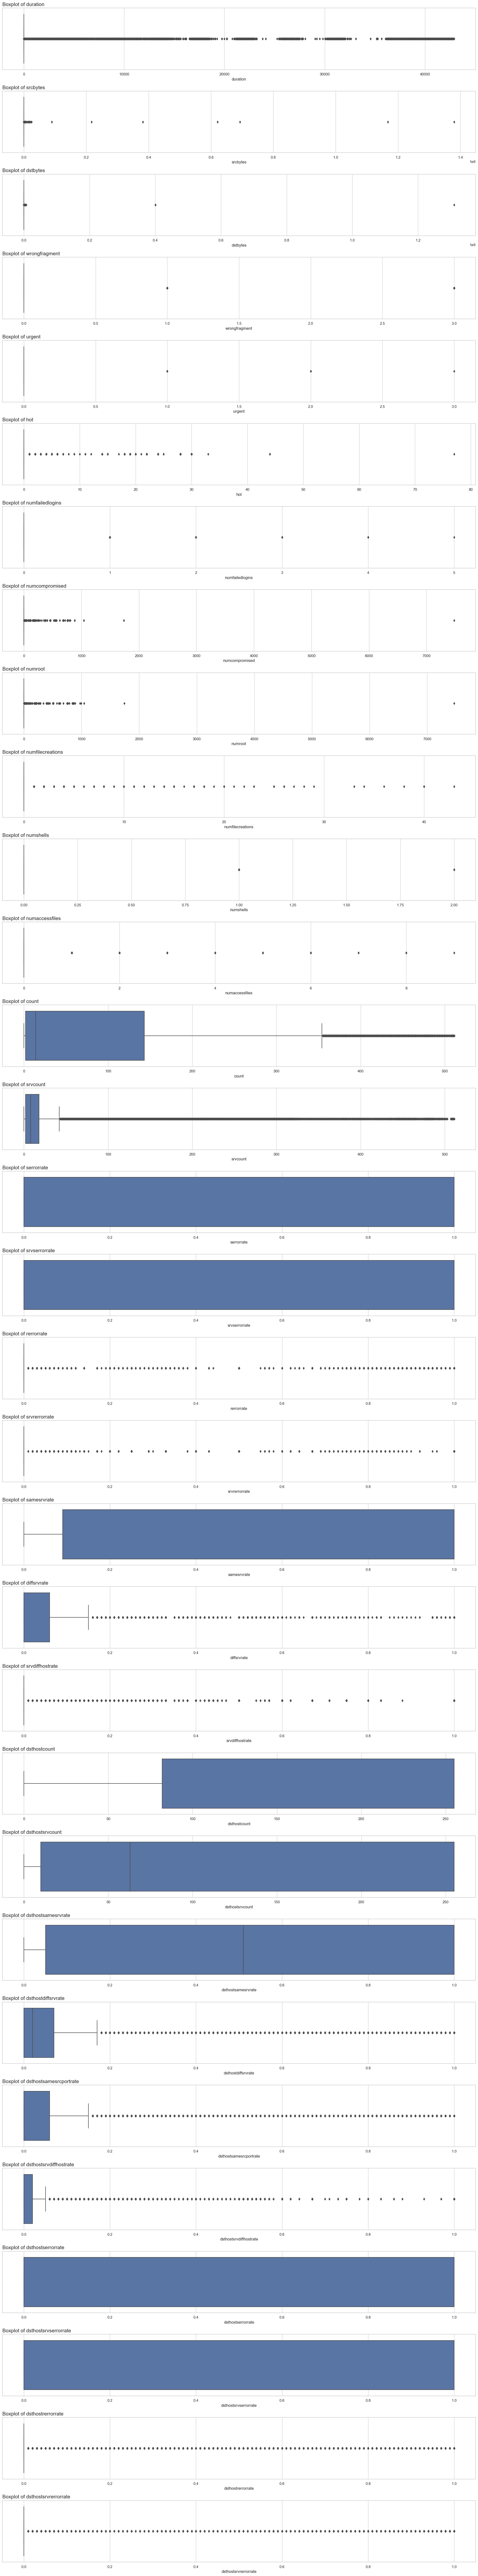

In [21]:
# box plots to visualize the distribution of numerical attributes
plt.figure(figsize = (20, 110))
for i, column in enumerate(num_columns, 1):
    plt.subplot(32, 1, i)
    sns.boxplot(data = df, x = column)
    plt.title(f"Boxplot of {column}", fontsize = 15, loc = "left")
    plt.xlabel(column)
plt.tight_layout()
plt.savefig("../artifacts/box_plots_of_numerical_attributes.png")
plt.show()

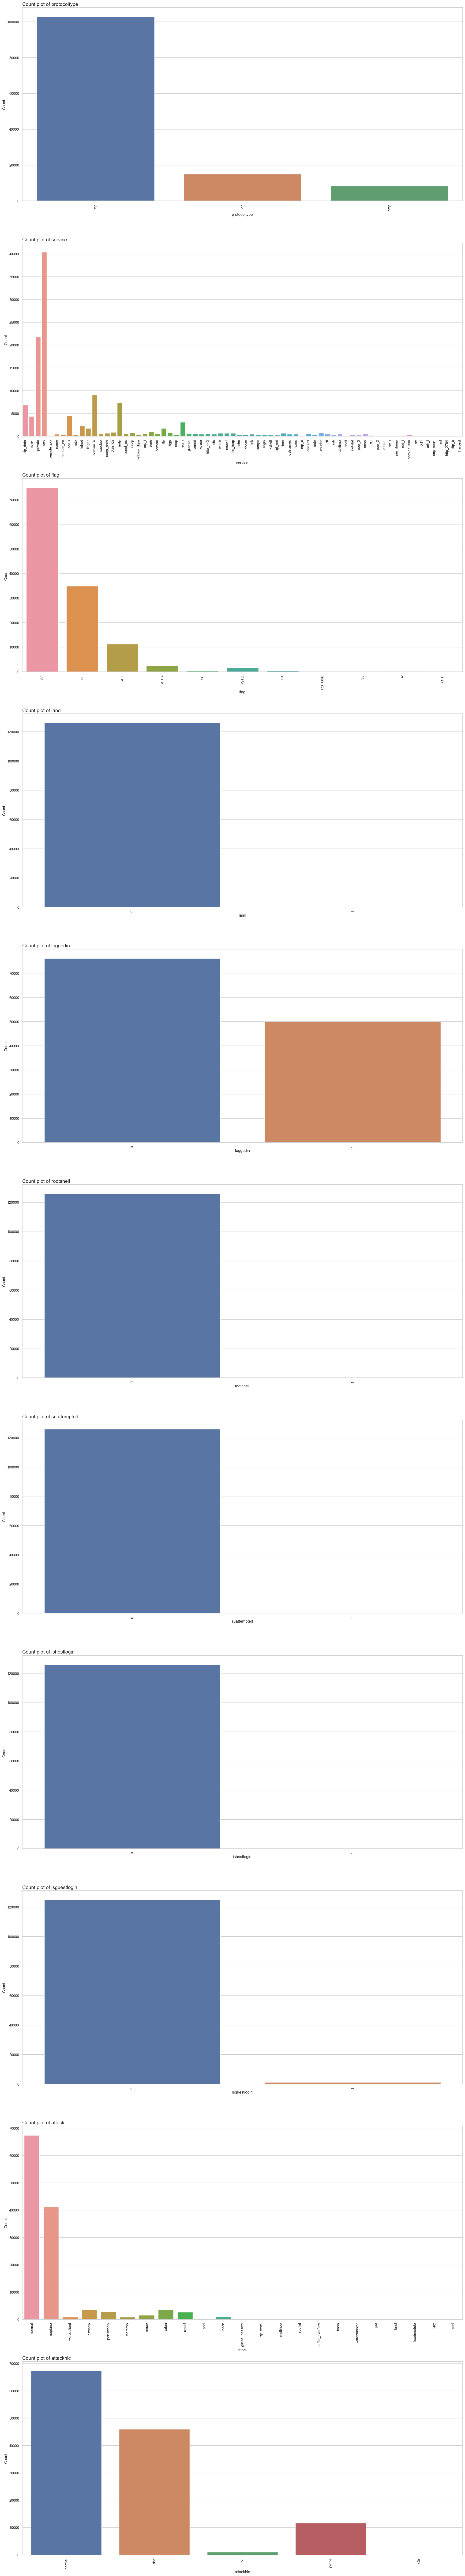

In [22]:
# count plots to visualize the frequencies of categorical attributes
plt.figure(figsize = (20, 110))
for i, column in enumerate(cat_columns, 1):
    plt.subplot(11, 1, i)
    sns.countplot(data = df, x = column)
    plt.title(f"Count plot of {column}", fontsize = 15, loc = "left")
    plt.xlabel(column)
    plt.xticks(rotation = 90)
    plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../artifacts/count_plots_of_categorical_attributes.png")
plt.show()

In [23]:
# heatmap to understand the correlation of numerical attributes
corr_matrix = df[num_columns].corr()
corr_matrix

,duration,srcbytes,dstbytes,wrongfragment,urgent,hot,numfailedlogins,numcompromised,numroot,numfilecreations,numshells,numaccessfiles,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate
duration,1.000000,0.070737,0.034878,-0.009866,0.003830,0.000705,0.009528,0.042679,0.045519,0.099116,-0.001593,0.070420,-0.079042,-0.039470,-0.069873,-0.069510,0.200682,0.199961,0.074681,-0.013738,-0.040158,0.050570,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024
srcbytes,0.070737,1.000000,0.000204,-0.000693,-0.000059,0.000295,-0.000208,-0.000086,-0.000093,-0.000179,-0.000134,-0.000309,-0.005152,-0.002792,-0.003228,-0.003438,0.013782,0.013975,0.003899,-0.000432,-0.002608,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449
dstbytes,0.034878,0.000204,1.000000,-0.000440,0.000248,-0.000344,0.000504,0.001233,0.001229,0.000089,-0.000083,0.000339,-0.003543,-0.001754,-0.003059,-0.003038,0.011176,0.011052,0.003788,-0.001703,-0.001674,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223
wrongfragment,-0.009866,-0.000693,-0.000440,1.000000,-0.000692,-0.008508,-0.002418,-0.001044,-0.001108,-0.002343,-0.001665,-0.003689,-0.020819,0.024457,-0.043316,-0.056549,-0.033052,-0.033507,0.054759,-0.026638,-0.026247,0.041056,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682
urgent,0.003830,-0.000059,0.000248,-0.000692,1.000000,0.000293,0.097507,0.033329,0.032470,0.024918,-0.000144,0.010803,-0.005615,-0.002848,-0.004929,-0.004889,-0.002896,-0.002897,0.005967,-0.002705,-0.002898,-0.006941,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912
hot,0.000705,0.000295,-0.000344,-0.008508,0.000293,1.000000,0.003715,0.002014,0.001510,0.028716,0.004723,-0.001987,-0.068697,-0.034575,-0.059083,-0.058713,-0.032382,-0.031436,0.069365,-0.016212,-0.026781,-0.012249,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670
numfailedlogins,0.009528,-0.000208,0.000504,-0.002418,0.097507,0.003715,1.000000,0.019085,0.018112,0.021774,-0.000503,0.000652,-0.019544,-0.009880,-0.015254,-0.015899,0.022193,0.021870,0.019477,-0.004438,-0.010122,-0.025476,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359
numcompromised,0.042679,-0.000086,0.001233,-0.001044,0.033329,0.002014,0.019085,1.000000,0.998833,0.015976,0.001338,0.299631,-0.008434,-0.004279,-0.005297,-0.005278,-0.003682,-0.003642,0.008944,-0.004035,-0.004227,-0.010928,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219
numroot,0.045519,-0.000093,0.001229,-0.001108,0.032470,0.001510,0.018112,0.998833,1.000000,0.016397,0.002028,0.327792,-0.008970,-0.004553,-0.005714,-0.005675,-0.003987,-0.004001,0.009471,-0.004074,-0.004502,-0.011546,-0.011126,-0.005918,0.003342,-0.001646,0.004496,-0.004803,-0.005282,-0.003827,-0.003497
numfilecreations,0.099116,-0.000179,0.000089,-0.002343,0.024918,0.028716,0.021774,0.015976,0.016397,1.000000,0.038708,0.103414,-0.018701,-0.009520,-0.012078,-0.012494,-0.007036,-0.007116,0.019046,-0.007869,-0.007365,-0.001344,-0.019311,-0.017325,0.006184,-0.006837,0.000974,0.003405,-0.000247,-0.005235,-0.004176


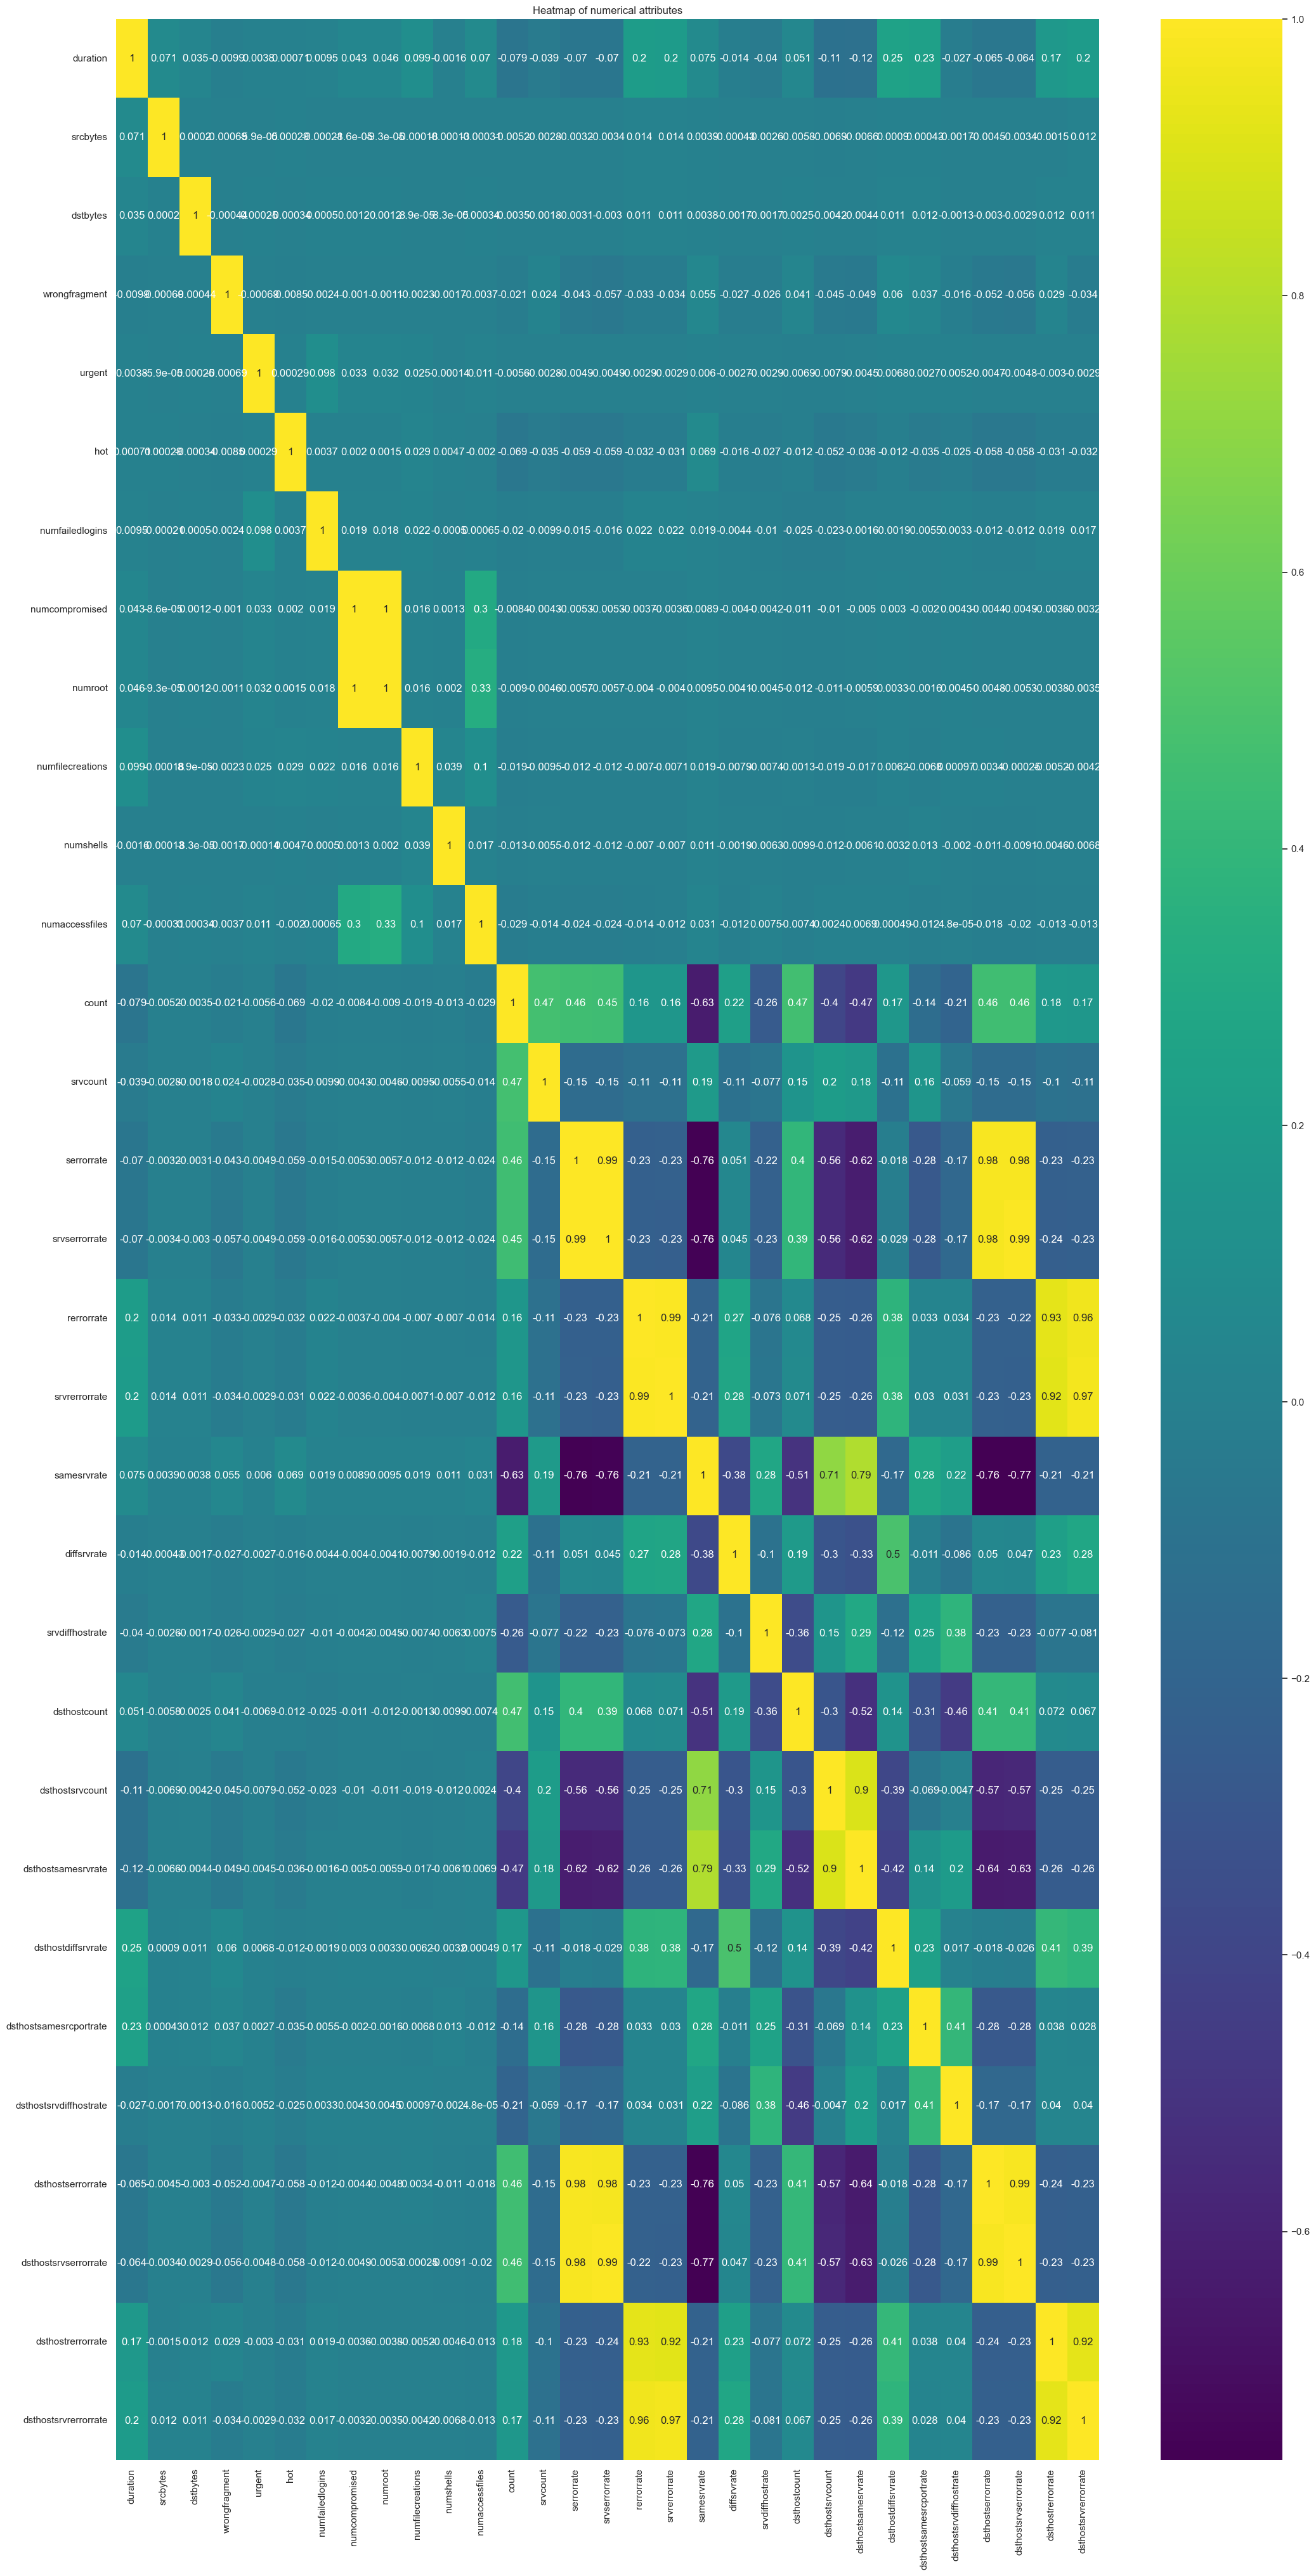

In [24]:
plt.figure(figsize = (20, 20))
plt.title("Heatmap of numerical attributes")
sns.heatmap(corr_matrix, annot = True, cmap = "viridis")
plt.savefig("../artifacts/heatmap_of_numerical_attributes.png")
plt.show()